# BE223A 2019 Project Pipeline

In [1]:
import os, sys
import pandas as pd
import numpy as np

# CT Segmentation
sys.path.append('CT_Segmentation')
sys.path.append('CT_Segmentation/PIN_FUNCTIONS')

import CT_Segmentation.segment_skull as sk
import CT_Segmentation.segment_DBS as sdbs
import CT_Segmentation.PIN_FUNCTIONS.main as seg_pin

# Fluoro Pin tip extraction
import Fluoro_Segmentation.pin_tips_extract as ptx

# Find CT Features: Skull Curvature, Pin Tips, DBS Leads

In [2]:
root_data_dir = root_data_dir=os.path.join(os.getcwd(),'data') # Change for different systems


In [3]:
# Run on all subjects
import re

root_data_dir = root_data_dir=os.path.join(os.getcwd(),'data') # Change for different systems
subject_dirs = os.listdir(root_data_dir)

In [ ]:
for sd in subject_dirs:
    if sd[0] == '.':
        continue

    s_files = os.listdir(
        os.path.join(root_data_dir, sd)
    )
    # Search for preopCT scan
    preop_files = [x for x in s_files if ('preopct' in x.lower()) and (x.split('.')[-1] == 'nii')]
    
    if len(preop_files) > 1:
        print('Found many files:', preop_files)
    if not len(preop_files):
        print('Found no preopCT files')
        continue
    preop_CT_path = os.path.join(
        root_data_dir,
        os.path.join(
            sd,
            preop_files[0]
        )
    )
        
    hull_mat_path = os.path.join(
        root_data_dir,
        os.path.join(
            sd,
            'hull.mat'
        )
    )
    # Get subject from ct file name
    subject = preop_files[0].split('.')[0].split('_')[-1]
    print('\nSubject:', subject)
    
    # Get skull
    skull_vertices, dense_skull = sk.segment_skull(
        preop_CT_path, hull_mat_path, 
        os.path.join('CT_Segmentation', 'SKULL_NII'), 
        subject, 
        preview=True, 
        chunk_size=100, 
        save=True,
    )


Subject: bG02

LOADING CT

LOADING HULL

CREATING CONVEX HULL

NORMALIZING AND RESHAPING CT DATA
Normalizing from: -1598.0870361328125 3623.784912109375
To range: 0.0 1.0


| |                         #                   | 7127867 Elapsed Time: 0:00:42
 24% (13516 of 56198) |####              | Elapsed Time: 0:00:00 ETA:   0:00:00


SCALING HULL
[147.74911661  97.64222615  88.17756184]


100% (56198 of 56198) |##################| Elapsed Time: 0:00:00 Time:  0:00:00



FILTERING CT FOR REGIONS OUTSIDE ORIGINAL HULL
...Splitting data in to chunks
	Done. Chunks created: 71278
...Creating inputs


  0% (34 of 71278) |                     | Elapsed Time: 0:00:00 ETA:   0:03:35

	Done
...Computing if chunks in Hull


 31% (22394 of 71278) |#####             | Elapsed Time: 0:01:06 ETA:   0:02:12


Subject: bG03

LOADING CT

LOADING HULL

CREATING CONVEX HULL

NORMALIZING AND RESHAPING CT DATA
Setting points > 3500 to 3500
Normalizing from: -1412.3531494140625 3500.0
To range: 0.0 1.0


| | #                                           | 8749444 Elapsed Time: 0:01:02
  0% (8 of 17498) |                      | Elapsed Time: 0:00:00 ETA:   0:04:04


FILTERING CT FOR REGIONS INSIDE CORTICAL HULL
...Splitting data in to chunks
	Done. Chunks created: 17498
...Creating inputs
	Done
...Computing if chunks in Hull


100% (17498 of 17498) |##################| Elapsed Time: 0:02:44 Time:  0:02:44



APPLYING MIN THRESHOLD TO ISOLATE LEADS

FINDING LARGEST CONNECTED COMPONENTS

SHOWING PREVIEW


CT_Segmentation/helper_functions/reshape_data.py:83: RuntimeWarning: Mean of empty slice
  projection = np.nanmean(ct_data, axis=axis)


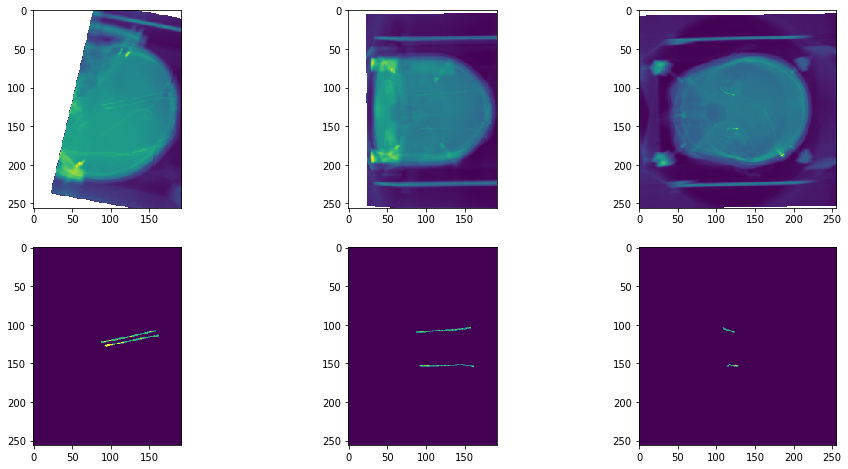


SAVING DBS LEADS OUTPUT TO: CT_Segmentation/DBS_NII/bG03_DBS.nii
Found no postopCT files

Subject: bG18

LOADING CT

LOADING HULL

CREATING CONVEX HULL

NORMALIZING AND RESHAPING CT DATA
Normalizing from: -1731.3155517578125 3909.457763671875
To range: 0.0 1.0


| |                                       #     | 7531626 Elapsed Time: 0:00:50
  0% (11 of 15063) |                     | Elapsed Time: 0:00:00 ETA:   0:02:21


FILTERING CT FOR REGIONS INSIDE CORTICAL HULL
...Splitting data in to chunks
	Done. Chunks created: 15063
...Creating inputs
	Done
...Computing if chunks in Hull


100% (15063 of 15063) |##################| Elapsed Time: 0:02:33 Time:  0:02:33



APPLYING MIN THRESHOLD TO ISOLATE LEADS

FINDING LARGEST CONNECTED COMPONENTS

SHOWING PREVIEW


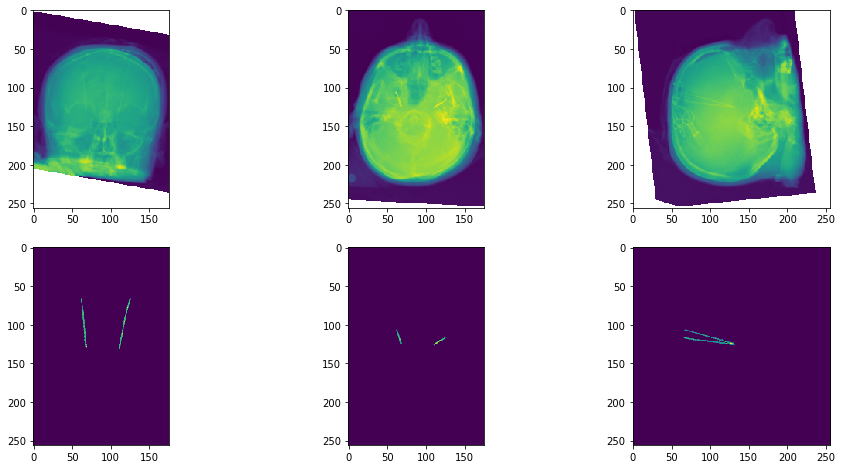


SAVING DBS LEADS OUTPUT TO: CT_Segmentation/DBS_NII/bG18_DBS.nii

Subject: 4

LOADING CT

LOADING HULL

CREATING CONVEX HULL

NORMALIZING AND RESHAPING CT DATA
Normalizing from: -1499.56494140625 3757.22705078125
To range: 0.0 1.0


| |                                         #   | 8459041 Elapsed Time: 0:00:49
  0% (8 of 16918) |                      | Elapsed Time: 0:00:00 ETA:   0:03:39


FILTERING CT FOR REGIONS INSIDE CORTICAL HULL
...Splitting data in to chunks
	Done. Chunks created: 16918
...Creating inputs
	Done
...Computing if chunks in Hull


 70% (11979 of 16918) |############      | Elapsed Time: 0:02:29 ETA:   0:01:14

KeyboardInterrupt: 

In [5]:
for sd in subject_dirs:
    if sd[0] == '.':
        continue

    s_files = os.listdir(
        os.path.join(root_data_dir, sd)
    )
    # Search for postopCT scan
    postop_files = [x for x in s_files if ('postopct' in x.lower()) and (x.split('.')[-1] == 'nii')]
    
    if len(postop_files) > 1:
        print('Found many files:', postop_files)
    if not len(postop_files):
        print('Found no postopCT files')
        continue
    postop_CT_path = os.path.join(
        root_data_dir,
        os.path.join(
            sd,
            postop_files[0]
        )
    )
        
    hull_mat_path = os.path.join(
        root_data_dir,
        os.path.join(
            sd,
            'hull.mat'
        )
    )
    # Get subject from ct file name
    subject = postop_files[0].split('.')[0].split('_')[-1]
    print('\nSubject:', subject)
    
    # Get leads
    dbs_leads = sdbs.segment_DBS(
        postop_CT_path, hull_mat_path, 
        os.path.join('CT_Segmentation', 'DBS_NII'), 
        subject, 
        preview=True, 
        save=True,
    )

In [4]:
seg_pin.get_pin_locations(
    root_data_dir,
    os.path.join('CT_Segmentation', 'PIN_NII'),
    os.path.join('CT_Segmentation', 'PIN_NII'),    
)

Current working directory is:  C:\Users\hwz62\Desktop\a3
Output directed to:  CT_Segmentation\PIN_NII
['DBS_bG02', 'DBS_bG03', 'DBS_bG06', 'DBS_bG09_2', 'DBS_bG10', 'DBS_bG12', 'DBS_bG13', 'DBS_bG17', 'DBS_bG18', 'DBS_bG19', 'example', 'fpinout', 'fpinoutFluoro_subject27_7.png', 'fpinoutIM-0001-0001_0.png', 'fpinoutIM-0001-0001_1.png', 'fpinoutIM-0001-0001_10.png', 'fpinoutIM-0001-0001_2.png', 'fpinoutIM-0001-0001_3.png', 'fpinoutIM-0001-0001_4.png', 'fpinoutIM-0001-0001_5.png', 'fpinoutIM-0001-0001_6.png', 'fpinoutIM-0001-0001_8.png', 'fpinoutIM-0001-0001_9.png', 'fpinoutfluoro_subject_1_11.png', 'fpinoutfluoro_subject_2_12.png', 'fpinoutfluoro_subject_3_13.png', 'fpinoutfluoro_subject_4_14.png', 'fpinoutfluoro_subject_5_15.png', 'subject_1', 'subject_2', 'subject_3', 'subject_4', 'subject_5']
DBS_bG02
['bG02_dense_skull.nii', 'coregistered_preopCT_DBS_bG02.nii', 'cortex_indiv.mat', 'hull.mat', 'IM-0001-0001.tif', 'skull_frame.mat', 'T1.nii.gz']
found file:  bG02_dense_skull.nii
found

NotADirectoryError: [WinError 267] The directory name is invalid: 'C:\\Users\\hwz62\\Desktop\\a3\\data\\fpinoutFluoro_subject27_7.png'

## Inputs

To load data of patient:

1. Root is the current directory where 'Consolidated_pipeline.ipynb' sits
2. There is a folder called 'data', please place patient data in that folder.
3. For variable 'subject', please replace FOLDER with folder name of where subject's files are stored
4. Please input appropriate filename in place of CT_PLACEHOLDER for the preop CT. Include the extension (eg '.nii')
5. Please input appropriate filename in place of FLUORO_PLACEHOLDER for the fluoroscopy image. Include the extension (eg '.tif')
6. Please input appropriate filename in place of HULL_PLACEHOLDER for the hull. Include the extension (eg '.mat')

In [8]:
root_data_dir = root_data_dir=os.path.join(os.getcwd(),'data') # Change for different systems
subjects = os.listdir(root_data_dir)
subject = 'FOLDER'

preop_ct_filename = "CT_PLACEHOLDER"
preop_CT_path = os.path.join(
    root_data_dir,
    os.path.join(
        subject,
        preop_ct_filename
    )
)

fluoro_filename = "FLUORO_PLACEHOLDER"
fluoro_path = os.path.join(
    root_data_dir,
    os.path.join(
        subject,
        fluoro_filename
    )
)

hull_filename = "HULL_PLACEHOLDER"
hull_mat_path = os.path.join(
    root_data_dir,
    os.path.join(
        subject,
        hull_filename
    )
)

In [4]:
root_data_dir = root_data_dir=os.path.join(os.getcwd(),'data') # Change for different systems
subjects = os.listdir(root_data_dir)
subject = 'subject_4'

preop_ct_filename = "preopCT_subject_4.nii"
preop_CT_path = os.path.join(
    root_data_dir,
    os.path.join(
        subject,
        preop_ct_filename
    )
)

fluoro_filename = "fluoro_subject_4.tif"
fluoro_path = os.path.join(
    root_data_dir,
    os.path.join(
        subject,
        fluoro_filename
    )
)

hull_filename = "hull.mat"
hull_mat_path = os.path.join(
    root_data_dir,
    os.path.join(
        subject,
        hull_filename
    )
)

## Fluoro segmentation

In [5]:
import Fluoro_Segmentation.localize_pins as ptx

path_to_root = os.path.join(os.getcwd(),'data')
os.makedirs('data/fpinout/')
output = "C:/Users/hwz62/Desktop/a3/data/fpinout"
fluro_object = ptx.PinTips_All(path_to_root, output)
fluro_object.extract_pin()

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\AnilYadav\\Desktop\\Projects\\brain\\data'

## CT Segmentation

In [6]:
import importlib
importlib.reload(sk)
skull_vertices, dense_skull = sk.segment_skull(
    preop_CT_path, hull_mat_path, 
    os.path.join('data',subject),
    subject, 
    preview=True, 
    chunk_size=100, 
    save=True,
)


LOADING CT

LOADING HULL

CREATING CONVEX HULL

NORMALIZING AND RESHAPING CT DATA
Normalizing from: -1572.4033203125 3642.94970703125
To range: 0.0 1.0


/ |#                                            | 3962880 Elapsed Time: 0:00:18

KeyboardInterrupt: 

## Pintip Segmentation

In [7]:
import PIN_FUNCTIONS as pinct

pinct.main(
    root_data_dir,
    os.path.join(root_data_dir,subject),
    os.path.join(root_data_dir,subject)
)

AttributeError: module 'PIN_FUNCTIONS' has no attribute 'main'

## Electrode Segmentation

Data should be loaded into the 'data' folder found in the root directory, one subject per folder.
Please replace SUBJECT with the correct subject folder name (eg subject_1)
Please replace FLUORO with desired fluoroscopy image, including extension (eg fluoro_subject_1b.tif). Algorithm will accept .tif or .jpg formats

In [ ]:
import Electrode_Segmentation.electrode_segmentation as electrode

in_path=in_path=os.path.join('data','SUBJECT','FLUORO')
save_path=os.path.join('data','SUBJECT','electrode.npy')
out=electrode.electrode_detection(in_path,save_path)

In [14]:
#This is a test example for one subject, subject 4 which has all parts. Remove before production
#import Fluoro_Segmentation.electrode_segmentation as electrode
import Electrode_Segmentation.electrode_detection1 as electrode

in_path=in_path=os.path.join('data','subject_4','fluoro_subject_4.tif')
save_path=os.path.join('data','subject_4','electrode.npy')
electrode_out=electrode.electrode_detection(in_path,save_path)


ModuleNotFoundError: No module named 'Electrode_Segmentation'

C:\Users\hwz62\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


big_radius =  367
big_central_coordinate =  (368, 576)


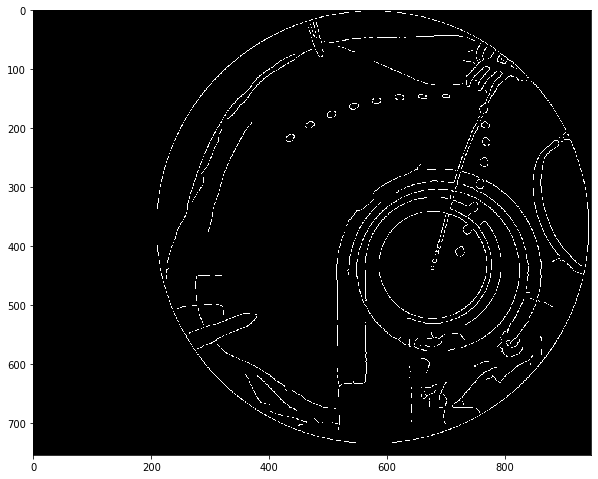

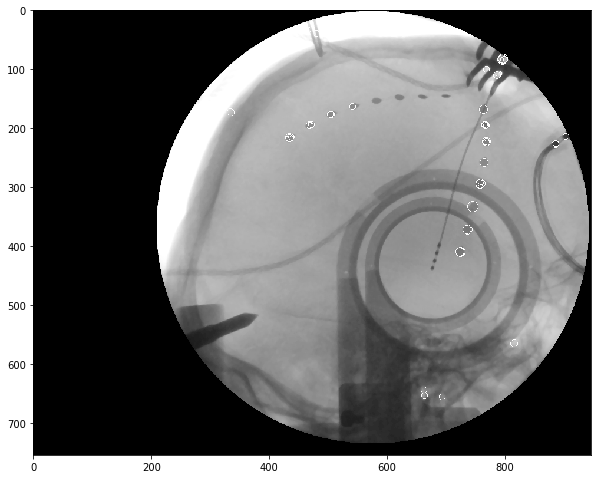

slope is  -0.2905201163329119
intercept is  303.9396536026263
r squared is  0.05328228208085566
r_squared :  0.05328228208085566
slope is  -1.848545156675435
intercept is  1699.6477932184225
r squared is  0.34780839014740816
r_squared :  0.34780839014740816
good cluster: 
 [[258 765]
 [168 764]
 [295 758]
 [194 766]
 [227 886]
 [223 769]
 [214 904]
 [224 769]
 [410 724]
 [222 768]
 [226 887]
 [100 769]
 [294 759]
 [565 816]
 [372 736]
 [195 767]
 [372 737]
 [410 725]
 [ 82 797]
 [195 769]
 [654 664]
 [ 84 793]
 [292 759]
 [ 84 799]
 [110 787]
 [108 790]
 [656 694]
 [644 663]
 [291 760]
 [225 770]
 [333 746]
 [ 84 796]]


C:\Users\hwz62\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


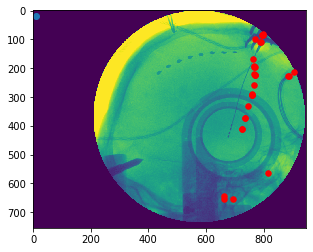

In [2]:
from Fluoro_Segmentation import electrode_detection1 as electrode

in_path=in_path=os.path.join('Data','subject_1','fluoro_subject_1c.tif')
save_path=os.path.join('Data','subject_1','electrode.npy')
electrode_out=electrode.electrode_detection(in_path,save_path)

## DBS Segmentation

In [ ]:
# required packages are cv2, numpy, matplotlib.pyplot
# input is fluoroscopy image in .tif format (note .jpg format doesn't work)

import cv2 
import numpy as np 
import matplotlib.pyplot as plt
import math

input_images = ["/Users/Jenny/final testing/fluoro_subject_1c/fluoro_subject_1c.tif",
                "/Users/Jenny/final testing/fluoro_subject_2/fluoro_subject_2.tif",
                "/Users/Jenny/final testing/fluoro_subject_3/fluoro_subject_3.tif",
                "/Users/Jenny/final testing/fluoro_subject_4/fluoro_subject_4.tif",
                "/Users/Jenny/final testing/fluoro_subject_5/fluoro_subject_5.tif",
                "/Users/Jenny/final testing/DBS_bG02/DBS_bG02.tif",
                "/Users/Jenny/final testing/DBS_bG03/DBS_bG03.tif",
                "/Users/Jenny/final testing/DBS_bG06/DBS_bG06.tif",
                "/Users/Jenny/final testing/DBS_bG09/DBS_bG09.tif",
                "/Users/Jenny/final testing/DBS_bG10/DBS_bG10.tif",
                "/Users/Jenny/final testing/DBS_bG12/DBS_bG12.tif",
                "/Users/Jenny/final testing/DBS_bG13/DBS_bG13.tif",
                "/Users/Jenny/final testing/DBS_bG17/DBS_bG17.tif",
                "/Users/Jenny/final testing/DBS_bG18/DBS_bG18.tif",
                "/Users/Jenny/final testing/DBS_bG19/DBS_bG19.tif"]

# input is a list of input images, each element is a filepath
def fluoro_DBS (tif_images):
    for subject in tif_images:
        input_image = subject
      
        folder_name = "/".join((input_image).split("/")[:-1])
        output_path = folder_name + '/'
      
        # step 1 detect center of stereotactic frame
        center_of_frame = detect_circle(subject)
        print("center of frame is at ", center_of_frame)
      
        # step 2 detect vertical long lines as candidates
        DBS_lead, candidates = vertical_long_lines(subject, output_path,center_of_frame)
        other_half = on_same_line(DBS_lead, candidates)
        print("bottom half is ", DBS_lead)
        print("candidates are ", candidates)
        print("other half is ", other_half)
      
        # step 3 find two halves of DBS lead
        final_points = check_top_half(DBS_lead, other_half, center_of_frame)
        print("in fluoro, DBS lead is located at", final_points, "(x1,y1,x2,y2)")
      
        # step 4 connect them & output
        draw_lead_on_image(final_points,input_image, output_path)
        x1 = final_points[0][0][0]
        y1 = final_points[0][0][1]
        x2 = final_points[0][0][2]
        y2 = final_points[0][0][3]
        fill_in_pixels(x1,x2,y1,y2,output_path) 
        
# step 1 find frame, terminal end of DBS lead is always near the center of
# this circular frame

def detect_circle(input_fluoro):
   # Read image. 
    img_c = cv2.imread(input_fluoro, cv2.IMREAD_COLOR)   
    # Convert to grayscale. 
    gray = cv2.cvtColor(img_c, cv2.COLOR_BGR2GRAY) 
   
    # Blur using 3 * 3 kernel. 
    gray_blurred = cv2.blur(gray, (3, 3)) 

    # fluoroscopy images are not all the same size
    # circles' radiuses are between 8% - 22% of image size (on the x-axis)
    # subject1 is 755 x 947, most other subjects are 1024 x 1280

    # find image size on the x-axis axis
    one_ar_3d = np.asarray(img_c) # this is 3D array
    one_arr = one_ar_3d[:,:,:0]
    horizontal_size = np.shape(one_arr)[1]
    min_radius = int(horizontal_size * 0.08)
    max_radius = int(horizontal_size * 0.22)

    # Apply Hough transform on the blurred image. 
    detected_circles = cv2.HoughCircles(gray_blurred,  
                                       cv2.HOUGH_GRADIENT, 1, 30, param1 = 50, 
                                       param2 = 40, minRadius = min_radius, maxRadius = max_radius) 
    # min radius is ~80, max radius is ~150
   
    # filter to only circles in a certain region
    filtered_circles = list(filter(lambda x: x[0] >= 500 and x[0] <= 1100
                                  and x[1] >= 400 and x[1] <= 1000, detected_circles[0]))
   
    return filtered_circles[0]

# ******************************************************************************
# step 2 line detection
# out of all straight lines detected, 2 additional parameters are used to
# narrow down DBS lead: first vertical line of slope >= 1.5; second
# end point is near the center of the fram

def vertical_long_lines (input_fluoro, output_path, center_of_frame):
    img_l = cv2.imread(input_fluoro) 
    # Convert the img_l to grayscale 
    gray = cv2.cvtColor(img_l,cv2.COLOR_BGR2GRAY) 
  
    # Apply edge detection method on the image, output binary image
    edges = cv2.Canny(gray,80,150,apertureSize = 3) 
    # edges is a numpy.ndarray of original image size

    lines = cv2.HoughLinesP(edges, 1, np.pi/180, 50, maxLineGap=50)

    # filter 1/3: find only vertical lines
    vertical_lines = []
    for line in lines:
        x1 = (line[0])[0]
        y1 = (line[0])[1]
        x2 = (line[0])[2]
        y2 = (line[0])[3]
    
      # not perfectly vertical, avoid division by 0, (most likely left border)
        if x1 != x2:
            slope = (y2-y1)/(x2-x1) # equation to calculate slope
        
         # fairly vertical line (slope >=1.5, exclude horizontal lines:
        if slope != 0 and (abs(slope)) >= 1.5: 
            vertical_lines.append(line) # add this line to filtered list
            vertical_array = np.asarray(vertical_lines)
            
   # filter 2/3: find point closest to center of circle
   # receive center point of circle from circle-finding detection
    circle_center_x = int(center_of_frame[0])
    circle_center_y = int(center_of_frame[1])
    circle_center = [circle_center_x, circle_center_y]
   
    # function to find DBS lead coordinates
    DBS_lead = list_distances(vertical_lines,circle_center)
   
   # filter 3/3: find line with similar slope
   # convert list into numpy array
    other_half = on_same_line(DBS_lead, vertical_lines)
   
    return DBS_lead, other_half
   
def on_same_line (half_DBS, all_lines):
    top_half = []
    std_x1 = half_DBS[0][0]
    std_y1 = half_DBS[0][1]
    std_x2 = half_DBS[0][2]
    std_y2 = half_DBS[0][3]
    DBS_slope = (std_y2 - std_y1) / (std_x2 - std_x1)
    DBS_y_int = std_y1 - DBS_slope * std_x1
       
    for line in all_lines:
        x1 = line[0][0]
        y1 = line[0][1]
        x2 = line[0][2]
        y2 = line[0][3]
      
      # if this line is highly similar to standard, eliminate this
      # because it's the same segment
        if not ((abs (x1-std_x1)) < 17 and (abs (x2-std_x2)) < 17 and
              (abs (y1-std_y1)) < 17 and (abs (x2-std_x2)) < 17):     
         
         # given x1, and x2, predict y1, and y2 on the same line
            calc_y1 = DBS_slope * x1 + DBS_y_int
            calc_y2 = DBS_slope * x2 + DBS_y_int
         
         # if given line is close to predicted line, then append this to list
        if ((abs (calc_y1 - y1)) <= 20) and ((abs (calc_y2 - y2)) <= 20):
            top_half.append(line)
    return np.asarray(top_half)
   
# define calculate_distance function, accepts 4 parameters, point_x and
# point_y are x and y coordinates of the given point, center_x and center_y
# are x and y coordinates of the center of the circle. Function returns 
# the cartesian distance between these two points
def calculate_distance(point_x,point_y,center_x,center_y):
    distance = math.sqrt((point_x - center_x)**2 + (point_y - center_y)**2)
    return distance
 
# function list_distance accepts 2 parameters, list of lines (lol), 
# where each element contains 4 numbers: x, y cooridinates of two end points,
# and x,y cooridinate of center of the circle (center), 
# function returns a new list where the second element is the distance
# of the closest point to the center of the circle
def list_distances (lol, center):
    distances = []
    circle_x = center[0]
    circle_y = center[1]
    
    # loop over every line in lol
    for line in lol:
        point_a_x = line[0][0]
        point_a_y = line[0][1]
        point_b_x = line[0][2]
        point_b_y = line[0][3]
        
        # pass to helper function, accept shortest distance
        dist1 = calculate_distance(point_a_x, point_a_y, circle_x, circle_y)
        dist2 = calculate_distance(point_b_x, point_b_y, circle_x, circle_y)
        shortest = min(dist1,dist2)
        distances.append([line,shortest])
        
        # sort lines by their distance in ascending order
        distances.sort(key = lambda x: x[1])
    
    # this is list of x,y coordinates
    return distances[0][0]



# *****************************************************************************

# Step 3 examine the output of bottom half, and top half, separated by 
# circular frame

# function check_top_half examines the output of these 4 filters, there are 3 possible scenarios:
# scenario 1: length of top_half is 1, then only found original input bottom half, can't find top half.
# there are two scenarios in this case,
# A. if line is too far away from center of circle, then just extend to the center of the circle
# B. if line is too short, (only found the bottom half), then extend to certain length

# scenario 2: length of top half is more than 2, then found the top portion of DBS lead, simply connect
# this top portion with bottom portion

def predict_other_root(x1,y1,x2,y2):
   # equation of a straight line is y = mx + b
    m = (y2 - y1) / (x2 - x1)
    b = y1 - m * x1   
   
    dy = lambda distance, m: m*dx(distance,m)
    dx = lambda distance, m: math.sqrt(distance/(m**2+1))
    
    distance = 480**2
    point_b = (x1+dx(distance,m), y1+dy(distance,m))
    
    calc_x = int(point_b[0])
    calc_y = int(point_b[1])
    
    return [[[x1, y1, calc_x, calc_y]]]
 
def check_top_half (bottom, top_list, circle_center):
    length = len(top_list)
    
    std_x1 = bottom[0][0]
    std_y1 = bottom[0][1]
    std_x2 = bottom[0][2]
    std_y2 = bottom[0][3]
    circle_x = circle_center[0]
    circle_y = circle_center[1]
    
   # scenario 1: only found original input, can't find the other half
    if length == 1:
        x1 = top_list[0][0][0]
        y1 = top_list[0][0][1]
        x2 = top_list[0][0][2]
        y2 = top_list[0][0][3]
      
      # option A: line is too far away from center of the circle, then extend to the center
    if calculate_distance(x1,y1,circle_x,circle_y) > 150: 
        return [[[circle_x, circle_y, x2, y2]]]
      
      # option B: line is close to center of circle, but too short, extend to length 480
      # from the bottom point (center of the circle)
    else:
        print("x1 is ", x1)
        print("y1 is ", y1)
        print("x2 is ", x2)
        print("y2 is ", y2)
        return predict_other_root(x1,y1,x2,y2)
      
   # scenario 2: length of top half bigger 2, found the other half of DBS lead,
   elif length >= 2:
        # then connect the top portion with bottom portion
        x1 = bottom[0][0]
        y1 = bottom[0][1]
        x2 = top_list[0][0][2]
        y2 = top_list[0][0][3]
        return [[[x1,y1,x2,y2]]]
   
   # scenario 3: length of top half is 0, couldn't find the other half of DBS lead,
    elif length == 0:
       # then extend the bottom half toward the skull, until length is 480
        return predict_other_root(std_x1,std_y1,std_x2,std_y2)   
    
# ******************************************************************************

# step 4 fill in line pixels between 2 end points

def draw_lead_on_image(endpoints, original, output_path):
    final_out_path = output_path + "DBS_leads_fluoro" + ".jpg"
   # draw final DBS_lead
    original_image = cv2.imread(original,cv2.IMREAD_COLOR)
    cv2.line(original_image, (endpoints[0][0][0], endpoints[0][0][1]),
            (endpoints[0][0][2], endpoints[0][0][3]), (0, 0, 255), 3, cv2.LINE_AA)
    cv2.imwrite(final_out_path, original_image)

# function fill_in_pixels 
def fill_in_pixels (x1,x2,y1,y2,output_path):
    DBS_lead_out = output_path + "DBS_lead_fluoro" +".txt"
    line_output = open(DBS_lead_out, 'w')   
    # equation of a straight line is y = mx + b
    m = (y2 - y1) / (x2 - x1)
    b = y1 - m * x1   
   
    for i in range(int(x1), int(x2+1)):
        calc_y = int(m*i + b)
        coordinate = [i,calc_y]
      
      # write output to file
        line_output.write(str(coordinate))
        line_output.write('\n')
        
    line_output.close()

fluoro_DBS(input_images)

## Matlab

In [1]:
#Matlab wrapper incompatible with Python 3.7 - below is theoretical code

from mlabwrap import mlab

Lall=np.zeros(4,4,len(subject_dirs))
for sd,sdn in enumerate(subject_dirs):
    if sd[0] == '.':
        continue

    s_files = os.listdir(
        os.path.join(root_data_dir, sd)
    )
    # Search for preopCT scan
    preop_files = [x for x in s_files if ('preopct' in x.lower()) and (x.split('.')[-1] == 'nii')]
    
    if len(preop_files) > 1:
        print('Found many files:', preop_files)
    if not len(preop_files):
        print('Found no preopCT files')
        continue
    preop_CT_path = os.path.join(
        root_data_dir,
        os.path.join(
            sd,
            preop_files[0]
        )
    )
    # Get subject from ct file name
    subject = preop_files[0].split('.')[0].split('_')[-1]
    DBS_3d_ori,DBS_2d=mlab.loaddata(dbs_leads, ,subject,preop_CT_path)
    B_best_rotation,Best_translation=mlab.yurun(DBS_3d_ori,DBS_2d)
    Lh=mlab.yutoL(B_best_rotation,Best_translation)
    for i in range(4):
        for j in range(4):
            Lall(i,j,sdn)=Lh(i,j)

ModuleNotFoundError: No module named 'mlabwrap'

## Camera Projection

In [12]:
import os
import numpy as np
#Backup L in case Matlab part fails
L=np.array([[0,0,0.3846,-115.8077],
            [0,0.3846,0,-21.1538],
            [-0.3846,0,0,110],
            [0,0,0,0.3846]])

from CT_Projection.VirtualCamera.VirtualCamera import VirtualCamera
camera = VirtualCamera()

root_data_dir = root_data_dir=os.path.join(os.getcwd(),'data')
subject_dirs = os.listdir(root_data_dir)
for sd in subject_dirs:
    if sd[0] == '.':
        continue

    s_files = os.listdir(
        os.path.join(root_data_dir, sd)
    )
    # Search for preopCT scan
    preop_files = [x for x in s_files if ('preopct' in x.lower()) and (x.split('.')[-1] == 'nii')]
    
    if len(preop_files) > 1:
        print('Found many files:', preop_files)
    if not len(preop_files):
        print('Found no preopCT files')
        continue
    preop_CT_path = os.path.join(
        root_data_dir,
        os.path.join(
            sd,
            preop_files[0]
        )
    )
    ct_path = preop_CT_path 
        
    hull_mat_path = os.path.join(
        root_data_dir,
        os.path.join(
            sd,
            'hull_'+sd+'_.nii'
        )
    )
    camera.import_hull(hull_mat_path)
    camera.add_transformation_matrix(L)
    projected, origin = camera.project_2D_to_3D(electrode_out)
    f=open(str(sd)+'.txt','wb')
    for i in projected:
        f.write(i.tostring())
        f.write(b'\n')
    f.close()

FileNotFoundError: No such file or no access: 'C:\Users\hwz62\Desktop\a3\data\DBS_bG02\hull_DBS_bG02_.nii'

In [11]:
#This is a test example for one subject, subject 4 which has all parts. Remove before production
import os
import numpy as np
L=np.array([[0,0,0.3846,-115.8077],
            [0,0.3846,0,-21.1538],
            [-0.3846,0,0,110],
            [0,0,0,0.3846]])

from CT_Projection.VirtualCamera.VirtualCamera import VirtualCamera
camera = VirtualCamera()

root_data_dir = root_data_dir=os.path.join(os.getcwd(),'data')
subject_dirs = os.listdir(root_data_dir)

hull_mat_path = os.path.join(
        root_data_dir,
        os.path.join(
            subject_dirs[31],
            'hull_subject_4.nii'
        )
    )
camera.import_hull(hull_mat_path)
from CT_Projection.VirtualCamera.VirtualCamera import VirtualCamera
camera = VirtualCamera()
camera.import_hull(hull_mat_path)
camera.add_transformation_matrix(L)

electrode_out=np.load(os.path.join(root_data_dir,'subject_4','electrode.npy'))
projected, origin = camera.project_2D_to_3D(electrode_out)

load file
load file
